link    
* 모의고사 3회 2번 (p410)
* https://shiningyouandme.tistory.com/39?category=807628    



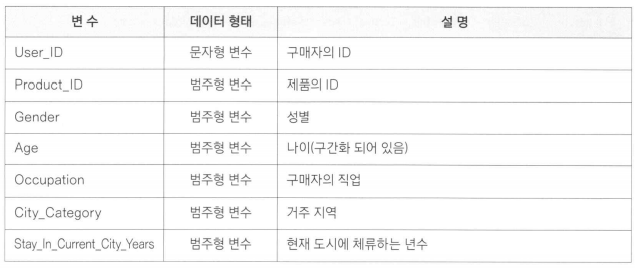

### 문제1
"BlackFriday"데이터에서 Product_Category_2, Product_Category_3의 NA값을 0값으로
대체하고 Product_Category_1,2,3 변수의 값을 다 더한 Product_all 변수를 생성하여 추가하라.

그리고 User_ID를 charecter변수로, Occupation, Marital_Status Product_Category_1,  Product_Category_2, Product_Category_3 변수를 범주형 변수로 변환하시오.

마지막으로 범주형 변수인 Gender, Age, City_Category, tay_In_Current_City_Years를 더미변수로 변환해서 BlackFriday데이터에 추가하시오.

1.1 NA 0처리.  
- Product_Category_2
- Product_Category_3

1.2 Product_all 생성.  
- Product_Category_1,2,3 합

1.3 User_ID를 charecter변수로 변경.
1.4 아래 변수를 범주형변수로 변환  
- Occupation
- Marital_Status
- Product_Category_1 
- Product_Category_2
- Product_Category_3
1.5 아래 범주형 변수를 더미변수로 변환해서 BlackFriday데이터에 추가    
- Gender
- Age
- City_Category

### 문제2 
1)에서 전처리가 완료된 데이터에서 User_ID, Product_ID, Gender, Age, City_Category, Stay_In_Current_City_Years, Product_all 변수를 제외한 나머지 변수들을 활용하여 kmeans군집분석을 수행하고 해석하시오.
(범주형 변수는 수치형 변수로 변환하여 분석에 활용하시오.) 

그리고 최적의 군집 개수를 찾아서 만일 군집 개수가 이전 결과와 다르면 분석을 다시 수행하여 해석하시오. 
    
2.1 아래 변수를 제외하고, kmeans 군집분석을 수행하고 해석하시오.  
(범주형 변수는 수치형 변수로 변환하여 분석에 활용하시오) 
- User_ID
- Product_ID
- Gender 
- Age
- City_Category
- Stay_In_Current_City_Years
- Product_all 

2.2 최적의 군집 개수를 찾아서 만일 군집 개수가 이전 결과와 다르면 분석을 다시 수행하여 해석하시오. 

### Init




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
!python --version

Python 3.7.11


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

In [ ]:
path = './drive/MyDrive/adp/edu/data/BlackFriday.csv'
# /content/drive/MyDrive/adp/edu/data/BlackFriday.csv

In [ ]:
df = pd.read_csv(path)

**EDA**

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(537577, 12)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [ ]:
df.describe()  # r, summary

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


1.1 NA 0처리.  
- Product_Category_2
- Product_Category_3 


1.2 Product_all 생성.  
- Product_Category_1,2,3합



1.3 User_ID를 charecter변수로 변경.

1.4 아래 변수를 범주형변수로 변환  
- Occupation
- Marital_Status
- Product_Category_1 
- Product_Category_2
- Product_Category_3


1.5 아래 범주형 변수를 더미변수로 변환해서 BlackFriday데이터에 추가    
- Gender
- Age
- City_Category

2.1 아래 변수를 제외하고, kmeans 군집분석을 수행하고 해석하시오.  
(범주형 변수는 수치형 변수로 변환하여 분석에 활용하시오) 
- User_ID
- Product_ID
- Gender 
- Age
- City_Category
- Stay_In_Current_City_Years
- Product_all 



2.2 최적의 군집 개수를 찾아서 만일 군집 개수가 이전 결과와 다르면 분석을 다시 수행하여 해석하시오.

